In [1]:
import numpy as np

inputs = np.array([[18,2], [20,3], [21, 4], [35,15], [36,16], [38, 18]])
outputs = np.array([0, 0, 0, 1, 1, 1])

In [2]:
# Graph
import pandas as pd

df1 = pd.DataFrame(data=inputs, columns=["age", "educational"])
df1

,age,educational
0,18,2
1,20,3
2,21,4
3,35,15
4,36,16
5,38,18


In [3]:
df2 = pd.DataFrame(data=outputs, columns=["class"])
df2

,class
0,0
1,0
2,0
3,1
4,1
5,1


In [4]:
df3 = pd.concat([df1, df2], axis=1)
df3

,age,educational,class
0,18,2,0
1,20,3,0
2,21,4,0
3,35,15,1
4,36,16,1
5,38,18,1


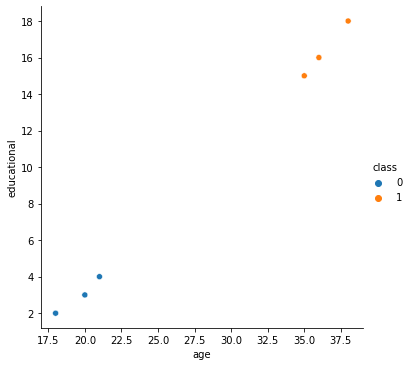

In [5]:
import seaborn as sns

sns.relplot(x="age", y="educational", data = df3, hue = "class")

In [6]:
# MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)
outputs = np.array([0, 0, 0, 1, 1, 1])
weights = np.array([0.0, 0.0])
learning_rate = 0.1

In [7]:
df1 = pd.DataFrame(data=inputs, columns=["age", "educational"])
df1

,age,educational
0,0.00,0.0000
1,0.10,0.0625
2,0.15,0.1250
3,0.85,0.8125
4,0.90,0.8750
5,1.00,1.0000


In [8]:
df2 = pd.DataFrame(data=outputs, columns=["class"])
df2

,class
0,0
1,0
2,0
3,1
4,1
5,1


In [9]:
df3 = pd.concat([df1, df2], axis=1)
df3

,age,educational,class
0,0.00,0.0000,0
1,0.10,0.0625,0
2,0.15,0.1250,0
3,0.85,0.8125,1
4,0.90,0.8750,1
5,1.00,1.0000,1


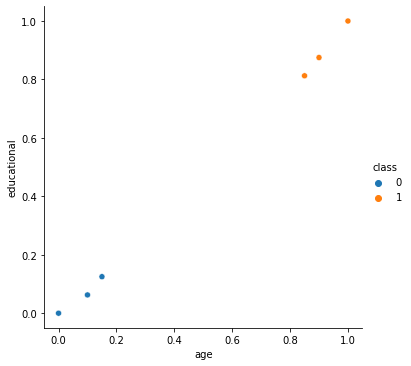

In [10]:
import seaborn as sns

sns.relplot(x="age", y="educational", data = df3, hue = "class")

In [11]:
# Sum function
def sum(inputs, weights):
    return inputs.dot(weights)
##########################################################################
# Step function
def step_function(sum):
    if (sum >= 1):
        return 1
    return 0
##########################################################################
# Calculate output
def calculate_output(instance):
    s = sum(instance,weights)
    return step_function(s)

In [12]:
# Train
def train():
    total_error = 1
    while (total_error != 0):
        total_error = 0
        for i in range(len(outputs)):
            prediction = calculate_output(inputs[i])
            error = abs(outputs[i] - prediction)
            total_error += error
            if error > 0:
                for j in range(len(weights)):
                    weights[j] = weights[j] + (learning_rate * inputs[i][j] * error)
                    print(f'Weight {j+1} updated: {str(weights[j])}')
        print('Total error: ' + str(total_error))

In [13]:
train()

Weight 1 updated: 0.085
Weight 2 updated: 0.08125
Weight 1 updated: 0.17500000000000002
Weight 2 updated: 0.16875
Weight 1 updated: 0.275
Weight 2 updated: 0.26875000000000004
Total error: 3
Weight 1 updated: 0.36000000000000004
Weight 2 updated: 0.35000000000000003
Weight 1 updated: 0.45000000000000007
Weight 2 updated: 0.43750000000000006
Weight 1 updated: 0.55
Weight 2 updated: 0.5375000000000001
Total error: 3
Weight 1 updated: 0.635
Weight 2 updated: 0.6187500000000001
Total error: 1
Total error: 0


In [14]:
inputs

array([[0.    , 0.    ],
       [0.1   , 0.0625],
       [0.15  , 0.125 ],
       [0.85  , 0.8125],
       [0.9   , 0.875 ],
       [1.    , 1.    ]])

In [15]:
weights

array([0.635  , 0.61875])

In [16]:
calculate_output(np.array([0.,0.]))

0

In [17]:
calculate_output(np.array([1.,1.]))

1

In [18]:
test_inputs = np.array([[17,5], [25,8], [45,10], [31,20]])
test_inputs = scaler.transform(test_inputs)
test_inputs

array([[-0.05  ,  0.1875],
       [ 0.35  ,  0.375 ],
       [ 1.35  ,  0.5   ],
       [ 0.65  ,  1.125 ]])

In [19]:
for i in range(len(test_inputs)):
    print(calculate_output(test_inputs[i]))

0
0
1
1
